# OSRM areas

## Download file


In [1]:
from osrmareas.downloader import GetPBF
download = GetPBF()

Convert the country names to lowercase and replace spaces with dashes (-).
source: https://download.geofabrik.de/


Canada, Alberta

In [2]:
download.sub_region(['alberta']).get(save_dir='sub_region_pbf')
# download.sub_region(['alberta'], country=["canada"], continent=["north-america"])

## OSRM Connection

In [3]:
from osrmareas.osrm import Server
cnd_alb = Server("alberta-latest.osm", "sub_region_pbf")

In [4]:
cnd_alb.gen_osrm_1()
cnd_alb.prepare_server_2()

Please run the following function only once for each .pbf file. (It takes some time to execute, and consume all the CPU)
Found sub_region_pbf\alberta-latest.osrm file
Done, generate a osrm file
Please run the following function only once for each .pbf file. (It takes some time to execute, and consume all the CPU)
Done, I have generated the local OSRM server with `{server}.run_server()`.


In [5]:
cnd_alb.run_server()

The server is running in the background, you can start making queries.


## OSRM Routes

In [6]:
from osrmareas import areas
from_ = [53.550905, -113.268436]
to_ = [53.548449, -113.258648]
rt = areas.get_osrm_route(from_, to_)
rt

c:\Users\Jhon\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


,geometry,dist_driving_km,dist_eucl_km,dest_lon,dest_lat,origin_lon,origin_lat
0,"LINESTRING (-113.26850 53.55087, -113.26895 53...",1.2714,0.703996,53.548449,-113.258648,53.550905,-113.268436


<Axes: >

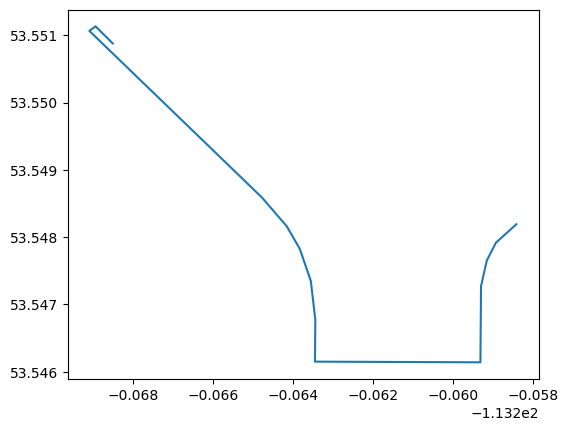

In [7]:
rt.plot()

the [Google Maps route](https://www.google.com/maps/dir/53.550905,+-113.268436/53.548449,+-113.258648/@53.5489972,-113.2648387,17z/data=!4m10!4m9!1m3!2m2!1d-113.268436!2d53.550905!1m3!2m2!1d-113.258648!2d53.548449!3e0?entry=ttu)


## OSRM Areas

In [8]:
all_rt=areas.get_routes(from_, 5, filter_km=True)
all_rt

100%|██████████| 100/100 [00:01<00:00, 98.36it/s]


,geometry,dist_driving_km,dist_eucl_km,dest_lon,dest_lat,origin_lon,origin_lat
0,"LINESTRING (-113.26850 53.55087, -113.26895 53...",4.5280,3.063772,53.537560,-113.308860,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.26895 53...",3.9101,2.823823,53.542899,-113.308860,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.27509 53...",4.1813,2.695792,53.548236,-113.308860,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.27509 53...",3.7328,2.695622,53.553573,-113.308860,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.27509 53...",3.7551,2.823291,53.558910,-113.308860,53.550905,-113.268436
...,...,...,...,...,...,...,...
0,"LINESTRING (-113.26850 53.55087, -113.26910 53...",4.9888,2.102228,53.564245,-113.245978,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.27509 53...",4.2471,2.556325,53.569580,-113.245978,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.26910 53...",4.7583,3.390238,53.526882,-113.236995,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.26895 53...",4.2615,2.559259,53.537560,-113.236995,53.550905,-113.268436


<Axes: >

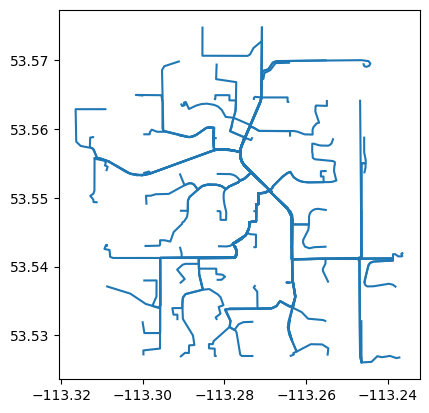

In [10]:
all_rt.plot()

## Ameba Shapefile

In [11]:
ameba = areas.get_ameba(all_rt, max_km = 5, alpha = 80)

<Axes: >

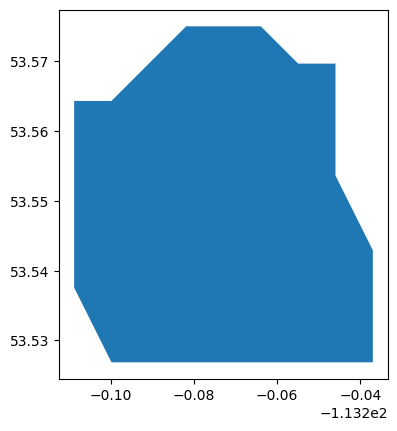

In [12]:
ameba.plot()